In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=cc69e528b2c05149a77e093e8fac4124bfa9a44997166340fd5f5c1d67177b21
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("als").config('spark.ui.port','4050').getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Carga de datos

In [ ]:
from zipfile import ZipFile
import os

# Ruta del archivo zip
games_zip = "/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/games.csv.zip"

# Ruta de destino para la extracción
destino_extraccion = "/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/Descomprimido"

# Descomprimir el archivo zip
with ZipFile(games_zip, 'r') as zip_ref:
    zip_ref.extractall(destino_extraccion)

In [ ]:
# Ruta del archivo zip
games_metadata_zip = "/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/games_metadata.json.zip"

# Ruta de destino para la extracción
destino_extraccion2 = "/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/Descomprimido"

# Descomprimir el archivo zip
with ZipFile(games_metadata_zip, 'r') as zip_ref:
    zip_ref.extractall(destino_extraccion2)

In [ ]:
# Ruta del archivo zip
recommendations_zip = "/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/recommendations.csv.zip"

# Ruta de destino para la extracción
destino_extraccion3 = "/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/Descomprimido"

# Descomprimir el archivo zip
with ZipFile(recommendations_zip, 'r') as zip_ref:
    zip_ref.extractall(destino_extraccion3)

In [ ]:
# Ruta del archivo zip
users_zip = "/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/users.csv.zip"

# Ruta de destino para la extracción
destino_extraccion4 = "/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/Descomprimido"

# Descomprimir el archivo zip
with ZipFile(users_zip, 'r') as zip_ref:
    zip_ref.extractall(destino_extraccion4)

In [ ]:
#Carga de datos
juegos = spark.read.csv("/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/Descomprimido/games.csv",header=True)
recomendaciones = spark.read.csv("/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/Descomprimido/recommendations.csv",header=True)
usuarios = spark.read.csv("/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/Descomprimido/users.csv",header=True)

In [ ]:
juegos.show()

+------+--------------------+------------+----+-----+-----+---------------+--------------+------------+-----------+--------------+--------+----------+
|app_id|               title|date_release| win|  mac|linux|         rating|positive_ratio|user_reviews|price_final|price_original|discount|steam_deck|
+------+--------------------+------------+----+-----+-----+---------------+--------------+------------+-----------+--------------+--------+----------+
| 13500|Prince of Persia:...|  2008-11-21|true|false|false|  Very Positive|            84|        2199|       9.99|          9.99|     0.0|      true|
| 22364|BRINK: Agents of ...|  2011-08-03|true|false|false|       Positive|            85|          21|       2.99|          2.99|     0.0|      true|
|113020|Monaco: What's Yo...|  2013-04-24|true| true| true|  Very Positive|            92|        3722|      14.99|         14.99|     0.0|      true|
|226560|  Escape Dead Island|  2014-11-18|true|false|false|          Mixed|            61|    

In [ ]:
recomendaciones.show()

+-------+-------+-----+----------+--------------+-----+-------+---------+
| app_id|helpful|funny|      date|is_recommended|hours|user_id|review_id|
+-------+-------+-----+----------+--------------+-----+-------+---------+
| 975370|      0|    0|2022-12-12|          true| 36.3|  51580|        0|
| 304390|      4|    0|2017-02-17|         false| 11.5|   2586|        1|
|1085660|      2|    0|2019-11-17|          true|336.5| 253880|        2|
| 703080|      0|    0|2022-09-23|          true| 27.4| 259432|        3|
| 526870|      0|    0|2021-01-10|          true|  7.9|  23869|        4|
| 306130|      0|    0|2021-10-10|          true|  8.6|  45425|        5|
| 238960|      0|    0|2017-11-25|          true|538.8|  88282|        6|
|    730|      0|    0|2021-11-30|         false|157.5|  63209|        7|
| 255710|      0|    0|2021-05-21|          true| 18.7| 354512|        8|
| 289070|      0|    0|2020-05-26|          true|397.5| 454422|        9|
| 431960|      0|    0|2020-10-14|    

In [ ]:
usuarios.show()

+--------+--------+-------+
| user_id|products|reviews|
+--------+--------+-------+
| 7360263|     359|      0|
|14020781|     156|      1|
| 8762579|     329|      4|
| 4820647|     176|      4|
| 5167327|      98|      2|
| 5664667|     145|      5|
| 5889167|     447|      2|
| 7281762|    1083|      1|
| 7445952|     273|      1|
| 7462927|      51|      1|
| 7922733|     108|      2|
| 9201535|     166|      1|
| 9514331|     237|      4|
| 9972262|     250|      3|
|10184828|     187|      1|
|10714376|    1824|      2|
|11237958|      12|      1|
|11274058|     102|      4|
|11300174|     210|     17|
|11463309|     318|      5|
+--------+--------+-------+
only showing top 20 rows



#2. Limpieza de datos

##Cambio a entero al dataframe juegos

In [ ]:
juegos.printSchema()

root
 |-- app_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- date_release: string (nullable = true)
 |-- win: string (nullable = true)
 |-- mac: string (nullable = true)
 |-- linux: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- positive_ratio: string (nullable = true)
 |-- user_reviews: string (nullable = true)
 |-- price_final: string (nullable = true)
 |-- price_original: string (nullable = true)
 |-- discount: string (nullable = true)
 |-- steam_deck: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col,explode
juegos = juegos.\
          withColumn('app_id',col('app_id').cast('integer')).\
          withColumn('positive_ratio',col('positive_ratio').cast('integer')).\
          withColumn('user_reviews',col('user_reviews').cast('integer'))
juegos.printSchema()

root
 |-- app_id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- date_release: string (nullable = true)
 |-- win: string (nullable = true)
 |-- mac: string (nullable = true)
 |-- linux: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- positive_ratio: integer (nullable = true)
 |-- user_reviews: integer (nullable = true)
 |-- price_final: string (nullable = true)
 |-- price_original: string (nullable = true)
 |-- discount: string (nullable = true)
 |-- steam_deck: string (nullable = true)



##Cambio a entero al dataframe recomendaciones

In [ ]:
recomendaciones.printSchema()

root
 |-- app_id: string (nullable = true)
 |-- helpful: string (nullable = true)
 |-- funny: string (nullable = true)
 |-- date: string (nullable = true)
 |-- is_recommended: string (nullable = true)
 |-- hours: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- review_id: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col,explode
recomendaciones = recomendaciones.\
          withColumn('app_id',col('app_id').cast('integer')).\
          withColumn('helpful',col('helpful').cast('integer')).\
          withColumn('funny',col('funny').cast('integer')).\
          withColumn('user_id',col('user_id').cast('integer')).\
          withColumn('review_id',col('review_id').cast('integer')).\
          withColumn('hours',col('hours').cast('integer'))
recomendaciones.printSchema()

root
 |-- app_id: integer (nullable = true)
 |-- helpful: integer (nullable = true)
 |-- funny: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- is_recommended: string (nullable = true)
 |-- hours: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- review_id: integer (nullable = true)



##Cambio a entero al dataframe usuarios

In [ ]:
usuarios.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- products: string (nullable = true)
 |-- reviews: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col,explode
usuarios = usuarios.\
          withColumn('user_id',col('user_id').cast('integer')).\
          withColumn('products',col('products').cast('integer')).\
          withColumn('reviews',col('reviews').cast('integer'))
usuarios.printSchema()

root
 |-- user_id: integer (nullable = true)
 |-- products: integer (nullable = true)
 |-- reviews: integer (nullable = true)



##Eliminar filas con valores nulos

In [ ]:
# Elimina filas con valores nulos
juegos_cleaned = juegos.na.drop()

# Muestra los primeros registros del DataFrame limpio
juegos_cleaned.show()

+------+--------------------+------------+----+-----+-----+---------------+--------------+------------+-----------+--------------+--------+----------+
|app_id|               title|date_release| win|  mac|linux|         rating|positive_ratio|user_reviews|price_final|price_original|discount|steam_deck|
+------+--------------------+------------+----+-----+-----+---------------+--------------+------------+-----------+--------------+--------+----------+
| 13500|Prince of Persia:...|  2008-11-21|true|false|false|  Very Positive|            84|        2199|       9.99|          9.99|     0.0|      true|
| 22364|BRINK: Agents of ...|  2011-08-03|true|false|false|       Positive|            85|          21|       2.99|          2.99|     0.0|      true|
|113020|Monaco: What's Yo...|  2013-04-24|true| true| true|  Very Positive|            92|        3722|      14.99|         14.99|     0.0|      true|
|226560|  Escape Dead Island|  2014-11-18|true|false|false|          Mixed|            61|    

In [ ]:
# Elimina filas con valores nulos
recomendaciones_cleaned = recomendaciones.na.drop()

# Muestra los primeros registros del DataFrame limpio
recomendaciones_cleaned.show()

+-------+-------+-----+----------+--------------+-----+-------+---------+
| app_id|helpful|funny|      date|is_recommended|hours|user_id|review_id|
+-------+-------+-----+----------+--------------+-----+-------+---------+
| 975370|      0|    0|2022-12-12|          true|   36|  51580|        0|
| 304390|      4|    0|2017-02-17|         false|   11|   2586|        1|
|1085660|      2|    0|2019-11-17|          true|  336| 253880|        2|
| 703080|      0|    0|2022-09-23|          true|   27| 259432|        3|
| 526870|      0|    0|2021-01-10|          true|    7|  23869|        4|
| 306130|      0|    0|2021-10-10|          true|    8|  45425|        5|
| 238960|      0|    0|2017-11-25|          true|  538|  88282|        6|
|    730|      0|    0|2021-11-30|         false|  157|  63209|        7|
| 255710|      0|    0|2021-05-21|          true|   18| 354512|        8|
| 289070|      0|    0|2020-05-26|          true|  397| 454422|        9|
| 431960|      0|    0|2020-10-14|    

In [ ]:
# Elimina filas con valores nulos
usuarios_cleaned = usuarios.na.drop()

# Muestra los primeros registros del DataFrame limpio
usuarios_cleaned.show()

+--------+--------+-------+
| user_id|products|reviews|
+--------+--------+-------+
| 7360263|     359|      0|
|14020781|     156|      1|
| 8762579|     329|      4|
| 4820647|     176|      4|
| 5167327|      98|      2|
| 5664667|     145|      5|
| 5889167|     447|      2|
| 7281762|    1083|      1|
| 7445952|     273|      1|
| 7462927|      51|      1|
| 7922733|     108|      2|
| 9201535|     166|      1|
| 9514331|     237|      4|
| 9972262|     250|      3|
|10184828|     187|      1|
|10714376|    1824|      2|
|11237958|      12|      1|
|11274058|     102|      4|
|11300174|     210|     17|
|11463309|     318|      5|
+--------+--------+-------+
only showing top 20 rows



In [ ]:
print(" Dimensiones de los datos", "\n",
      "Fila juegos ", juegos_cleaned.count(), " - ", "Columnas juegos", len(juegos_cleaned.columns), "\n",
      "Fila recomendaciones   ", recomendaciones_cleaned.count()  , " - ", "Columnas recomendaciones  ", len(recomendaciones_cleaned.columns), "\n",
      "Fila usuarios ", usuarios_cleaned.count() , " - ", "Columnas usuarios ", len(usuarios_cleaned.columns), "\n" )

 Dimensiones de los datos 
 Fila juegos  50872  -  Columnas juegos 13 
 Fila recomendaciones    41154794  -  Columnas recomendaciones   8 
 Fila usuarios  14306064  -  Columnas usuarios  3 



#3. Analisis Exploratorio

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Reducir el tamaño de los DataFrames a 200000 filas cada uno
recomendaciones_reduce = recomendaciones_cleaned.limit(200000)
usuarios_reduce = usuarios_cleaned.limit(200000)

In [ ]:
print(" Dimensiones de los datos", "\n",
      "Fila juegos ", juegos_cleaned.count(), " - ", "Columnas juegos", len(juegos_cleaned.columns), "\n",
      "Fila recomendaciones   ", recomendaciones_reduce.count()  , " - ", "Columnas recomendaciones  ", len(recomendaciones_reduce.columns), "\n",
      "Fila usuarios ", usuarios_reduce.count() , " - ", "Columnas usuarios ", len(usuarios_reduce.columns), "\n" )

 Dimensiones de los datos 
 Fila juegos  50872  -  Columnas juegos 13 
 Fila recomendaciones    200000  -  Columnas recomendaciones   8 
 Fila usuarios  200000  -  Columnas usuarios  3 



In [ ]:
usuario_pandas = usuarios_reduce.toPandas()
entrenamiento = juegos_cleaned.toPandas()
rating = recomendaciones_reduce.toPandas()

##Recopilar los datos de juegos y sus etiquetas correspondientes, identificar los juegos con la mayor cantidad de reseñas y organizar en orden descendente según su ratio positivo.


In [ ]:
metadata = spark.read.json("/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/Datos/Descomprimido/games_metadata.json")

In [ ]:
from pyspark.sql.functions import col

# Realizar la unión de los dos DataFrames en PySpark
gamesdf = juegos_cleaned.join(metadata, on='app_id')

# Estas son las columnas que te interesan
relevant_cols = ['app_id', 'title', 'positive_ratio', 'user_reviews', 'tags']
gamesdf = gamesdf.select(*relevant_cols)

# Ordenar por user_reviews para mantener los mejores 100 juegos revisados
gamesdf = gamesdf.orderBy('user_reviews', ascending=False)
gamesdf = gamesdf.limit(100)

# Calcular el promedio de user_reviews
review_avg = gamesdf.agg({'user_reviews': 'mean'}).collect()[0][0]

# Mostrar el DataFrame resultante
gamesdf.show()

+-------+--------------------+--------------+------------+--------------------+
| app_id|               title|positive_ratio|user_reviews|                tags|
+-------+--------------------+--------------+------------+--------------------+
|    730|Counter-Strike: G...|            88|     7494460|                  []|
| 578080| PUBG: BATTLEGROUNDS|            57|     2217226|                  []|
|    570|              Dota 2|            82|     2045628|                  []|
| 271590|  Grand Theft Auto V|            86|     1484122|                  []|
| 359550|Tom Clancy's Rain...|            86|      993312|                  []|
|    440|     Team Fortress 2|            93|      985819|                  []|
| 105600|            Terraria|            97|      943413|                  []|
|   4000|         Garry's Mod|            96|      853733|                  []|
| 252490|                Rust|            87|      786668|                  []|
|1172470|       Apex Legends™|          

Series Size:  110
Average Common Tags:  2.1818181818181817


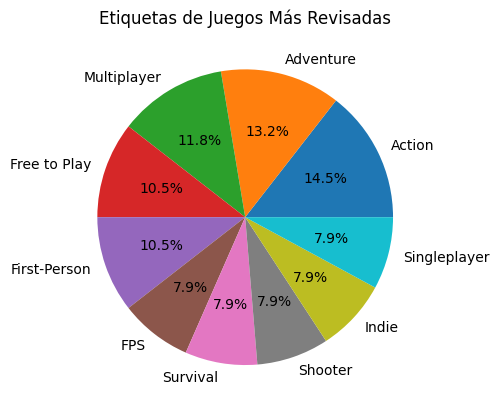

In [ ]:
from pyspark.sql.functions import explode

# Obtener la columna de tags y explotarla para obtener una fila por cada tag
tags_df = gamesdf.select('tags').withColumn('tag', explode('tags'))

# Contar la frecuencia de cada tag
tag_counts = tags_df.groupBy('tag').count()

# Ordenar los resultados en orden descendente
tag_counts = tag_counts.orderBy('count', ascending=False)

# Mostrar información sobre la serie
print("Series Size: ", tag_counts.count())
print("Average Common Tags: ", tag_counts.agg({'count': 'mean'}).collect()[0][0])

# Crear un gráfico para visualizar los resultados
tag_slice = tag_counts.limit(10).toPandas()
labels = tag_slice['tag'].tolist()

fig, ax = plt.subplots()
plt.title('Etiquetas de Juegos Más Revisadas')
pchart = ax.pie(tag_slice['count'], labels=labels, autopct='%1.1f%%')
plt.show()

Series Size:  10
Average Common Titles:  394130.5


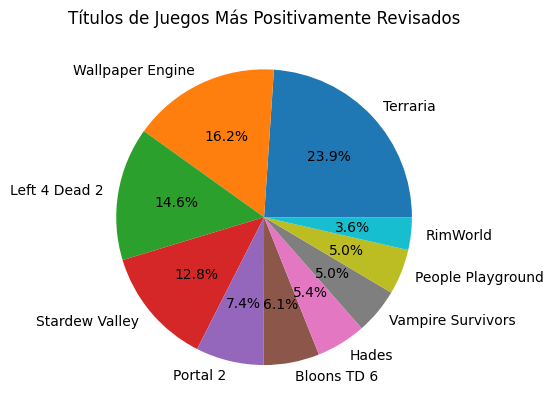

In [ ]:
from pyspark.sql.functions import desc

# Ordenar el DataFrame por 'positive_ratio' en orden descendente
gamesdf = gamesdf.orderBy(desc('positive_ratio'))

# Seleccionar los 10 juegos más positivamente revisados
positivedf = gamesdf.limit(10)

# Contar la frecuencia de cada título
title_counts = positivedf.groupBy('title').agg({'user_reviews': 'sum'})

# Ordenar los resultados en orden descendente
title_counts = title_counts.orderBy(desc('sum(user_reviews)'))

# Mostrar información sobre la serie
print("Series Size: ", title_counts.count())
print("Average Common Titles: ", title_counts.agg({'sum(user_reviews)': 'mean'}).collect()[0][0])

# Crear un gráfico para visualizar los resultados
title_slice = title_counts.limit(10).toPandas()
labels = title_slice['title'].tolist()

fig, ax = plt.subplots()
plt.title('Títulos de Juegos Más Positivamente Revisados')
pchart = ax.pie(title_slice['sum(user_reviews)'], labels=labels, autopct='%1.1f%%')
plt.show()

In [ ]:
from pyspark.sql.functions import sum

# Realizar la unión de los DataFrames usando la columna "app_id"
merged_df = juegos_cleaned.join(recomendaciones_reduce, on='app_id')

# Sumar las horas jugadas por cada app_id
sum_hours_df = merged_df.groupBy("app_id", "title").agg(sum("hours").alias("total_hours"))

In [ ]:
print(" Dimensiones de los datos", "\n",
      "Fila recomendaciones ", merged_df.count(), " - ", "Columnas recomendaciones", len(merged_df.columns))

 Dimensiones de los datos 
 Fila recomendaciones  200000  -  Columnas recomendaciones 20


In [ ]:
sum_hours_df.show()

+-------+--------------------+-----------+
| app_id|               title|total_hours|
+-------+--------------------+-----------+
| 975370|      Dwarf Fortress|      39529|
| 304390|          FOR HONOR™|     375559|
|1085660|           Destiny 2|     383769|
| 703080|          Planet Zoo|      99713|
| 526870|        Satisfactory|     400595|
| 306130|The Elder Scrolls...|     583084|
| 238960|       Path of Exile|    1160204|
|    730|Counter-Strike: G...|    2325331|
| 255710|    Cities: Skylines|     271443|
| 289070|Sid Meier’s Civil...|     605952|
| 431960|    Wallpaper Engine|     475610|
|1086940|     Baldur's Gate 3|     109263|
|1938090|       Call of Duty®|     480229|
|1286830|STAR WARS™: The O...|     197683|
|1172620|Sea of Thieves 20...|     464919|
| 635260|CarX Drift Racing...|      45163|
|1151340|          Fallout 76|     235533|
| 392160|     X4: Foundations|      71815|
|    570|              Dota 2|     897305|
| 534380|Dying Light 2 Sta...|     118955|
+-------+--

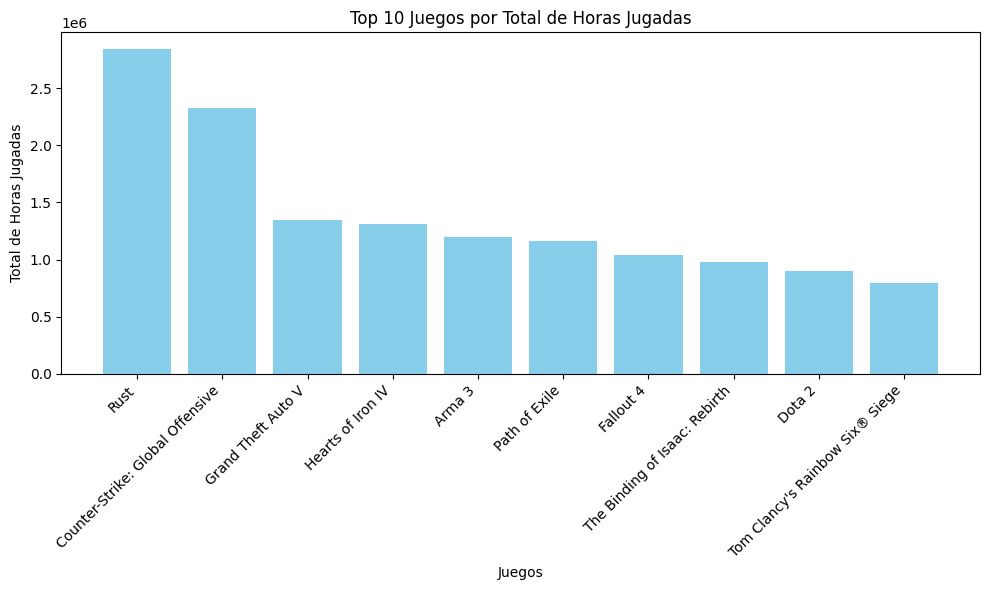

In [ ]:
# Obtener los datos del DataFrame como listas de Python
top_titles = sum_hours_df.orderBy("total_hours", ascending=False).limit(10).select("title").rdd.flatMap(lambda x: x).collect()
top_total_hours = sum_hours_df.orderBy("total_hours", ascending=False).limit(10).select("total_hours").rdd.flatMap(lambda x: x).collect()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_titles, top_total_hours, color='skyblue')
plt.xlabel('Juegos')
plt.ylabel('Total de Horas Jugadas')
plt.title('Top 10 Juegos por Total de Horas Jugadas')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#4. Procesamiento

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [ ]:
recomendaciones_reduce.printSchema()

root
 |-- app_id: integer (nullable = true)
 |-- helpful: integer (nullable = true)
 |-- funny: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- is_recommended: string (nullable = true)
 |-- hours: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- review_id: integer (nullable = true)



In [ ]:
ratings_union = recomendaciones_reduce.join(juegos_cleaned, on='app_id')
# Mostrar algunas filas del nuevo DataFrame
ratings_union.show()

+-------+-------+-----+----------+--------------+-----+-------+---------+--------------------+------------+----+-----+-----+--------------------+--------------+------------+-----------+--------------+--------+----------+
| app_id|helpful|funny|      date|is_recommended|hours|user_id|review_id|               title|date_release| win|  mac|linux|              rating|positive_ratio|user_reviews|price_final|price_original|discount|steam_deck|
+-------+-------+-----+----------+--------------+-----+-------+---------+--------------------+------------+----+-----+-----+--------------------+--------------+------------+-----------+--------------+--------+----------+
| 975370|      0|    0|2022-12-12|          true|   36|  51580|        0|      Dwarf Fortress|  2022-12-06|true|false|false|Overwhelmingly Po...|            95|       19665|       30.0|           0.0|     0.0|      true|
| 304390|      4|    0|2017-02-17|         false|   11|   2586|        1|          FOR HONOR™|  2017-02-13|true|fals

In [ ]:
num_filas = ratings_union.count()
num_columnas = len(ratings_union.columns)

print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")

Número de filas: 200000
Número de columnas: 20


In [ ]:
ratings_cleaned = ratings_union.select("user_id","app_id","title","hours","is_recommended")

# Mostrar el esquema del nuevo DataFrame
ratings_cleaned.printSchema()

# Mostrar algunas filas del nuevo DataFrame
ratings_cleaned.show()

root
 |-- user_id: integer (nullable = true)
 |-- app_id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- hours: integer (nullable = true)
 |-- is_recommended: string (nullable = true)

+-------+-------+--------------------+-----+--------------+
|user_id| app_id|               title|hours|is_recommended|
+-------+-------+--------------------+-----+--------------+
|  51580| 975370|      Dwarf Fortress|   36|          true|
|   2586| 304390|          FOR HONOR™|   11|         false|
| 253880|1085660|           Destiny 2|  336|          true|
| 259432| 703080|          Planet Zoo|   27|          true|
|  23869| 526870|        Satisfactory|    7|          true|
|  45425| 306130|The Elder Scrolls...|    8|          true|
|  88282| 238960|       Path of Exile|  538|          true|
|  63209|    730|Counter-Strike: G...|  157|         false|
| 354512| 255710|    Cities: Skylines|   18|          true|
| 454422| 289070|Sid Meier’s Civil...|  397|          true|
| 199725| 4319

##Se ha agregado una nueva columna denominada "rating" al conjunto de datos, que evalúa la cantidad de horas dedicadas a un juego y si el usuario lo recomendó. Esta columna clasifica los juegos en una escala de 1 a 5, asignando calificaciones más altas a aquellos con mayores horas jugadas y recomendaciones positivas.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

# Definir las condiciones y asignar un rating en consecuencia
ratings_cleaned = ratings_cleaned.withColumn(
    "rating",
    when((ratings_cleaned.hours >= 0) & (ratings_cleaned.hours <= 499) & (ratings_cleaned.is_recommended == "true"), 4)
    .when((ratings_cleaned.hours >= 500) & (ratings_cleaned.hours <= 999) & (ratings_cleaned.is_recommended == "true"), 5)
    .when((ratings_cleaned.hours >= 0) & (ratings_cleaned.hours <= 299) & (ratings_cleaned.is_recommended == "false"), 1)
    .when((ratings_cleaned.hours >= 300) & (ratings_cleaned.hours <= 599) & (ratings_cleaned.is_recommended == "false"), 2)
    .when((ratings_cleaned.hours >= 600) & (ratings_cleaned.hours <= 999) & (ratings_cleaned.is_recommended == "false"), 3)
    .otherwise(0)  # Manejar cualquier otro caso, si es necesario
)

# Muestra el DataFrame resultante con la nueva columna "rating"
ratings_cleaned.show()

+-------+-------+--------------------+-----+--------------+------+
|user_id| app_id|               title|hours|is_recommended|rating|
+-------+-------+--------------------+-----+--------------+------+
|  51580| 975370|      Dwarf Fortress|   36|          true|     4|
|   2586| 304390|          FOR HONOR™|   11|         false|     1|
| 253880|1085660|           Destiny 2|  336|          true|     4|
| 259432| 703080|          Planet Zoo|   27|          true|     4|
|  23869| 526870|        Satisfactory|    7|          true|     4|
|  45425| 306130|The Elder Scrolls...|    8|          true|     4|
|  88282| 238960|       Path of Exile|  538|          true|     5|
|  63209|    730|Counter-Strike: G...|  157|         false|     1|
| 354512| 255710|    Cities: Skylines|   18|          true|     4|
| 454422| 289070|Sid Meier’s Civil...|  397|          true|     4|
| 199725| 431960|    Wallpaper Engine|   30|          true|     4|
|  85822|1086940|     Baldur's Gate 3|   50|          true|   

##Dividir el DataFrame ratings_cleaned en tres conjuntos de datos: entrenamiento (train_data), prueba (test_data) y validación (validation).

In [ ]:
train_data, test_data, validation = ratings_cleaned.randomSplit([0.7, 0.2, 0.1], seed=42)

#train_data.write.option("header",True).csv('/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/ratings/rating_train-csv')
#test_data.write.option("header",True).csv('/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/ratings/rating_test-csv')
#validation.write.option("header",True).csv('/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/ratings/rating_validation-csv')

In [ ]:
print("Tamaño de dato de entrenamiento: ", train_data.count())
print("Tamaño de dato de prueba: ", test_data.count())
print("Tamaño de dato de validacion: ", validation.count())

Tamaño de dato de entrenamiento:  139838
Tamaño de dato de prueba:  39960
Tamaño de dato de validacion:  20202


In [ ]:
als = ALS(userCol="user_id", itemCol="app_id", ratingCol="rating",
          nonnegative=True, implicitPrefs=False, coldStartStrategy="drop")
type(als)

pyspark.ml.recommendation.ALS

##Se definen combinaciones de parámetros (rank y regParam) para evaluar modelos ALS, usando métrica RMSE.

In [ ]:
param_grid = ParamGridBuilder() \
              .addGrid(als.rank,[1]) \
              .addGrid(als.regParam,[0.3]) \
              .build()

evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol='prediction')
print("Numero de modelos a evaluar", len(param_grid))

Numero de modelos a evaluar 1


In [ ]:
cv = CrossValidator(estimator = als, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=5)
print(cv)

CrossValidator_eda4f03fb204


#5. Entrenamiento

In [ ]:
model = cv.fit(train_data)
best_model = model.bestModel

In [ ]:
from pyspark.ml.tuning import CrossValidatorModel
#Guardamos el modelo para un uso en futuro
#model.write().overwrite().save('/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/modelo')
#model = CrossValidatorModel.load(path='/content/drive/MyDrive/Datos Masivos/Proyectos/Proyecto_final/modelo')
#best_model = model.bestModel

In [ ]:
print("Mejor modelo 5")
print("Rank:", best_model._java_obj.parent().getRank())
print("MaxIter:", best_model._java_obj.parent().getMaxIter())
print("RegParam:", best_model._java_obj.parent().getRegParam())

test_predicciones = best_model.transform(test_data)

RMSE = evaluator.evaluate(test_predicciones)
print("RMSE: ",RMSE)

Mejor modelo 5
Rank: 1
MaxIter: 10
RegParam: 0.3
RMSE:  1.4277035596730039


**Mejor modelo 1:**
Rank: 7
MaxIter: 10
RegParam: 0.6
RMSE:  2.5076880277785705

**Mejor modelo 2:**
Rank: 6
MaxIter: 10
RegParam: 0.3
RMSE:  2.4081241623658416

**Mejor modelo 3:**
Rank: 4
MaxIter: 10
RegParam: 0.3
RMSE:  2.254908497737335

**Mejor modelo 4:**
Rank: 5
MaxIter: 10
RegParam: 0.1
RMSE:  2.050853303677055

**Mejor modelo 5:**
Rank: 1
MaxIter: 10
RegParam: 0.3
RMSE:  1.4277035596730039

In [ ]:
from pyspark.sql.functions import max, min

# Calcular el máximo y mínimo de las calificaciones
max_rating = ratings_cleaned.agg(max("rating")).collect()[0][0]
min_rating = ratings_cleaned.agg(min("rating")).collect()[0][0]

# Calcular el rango
rating_range = max_rating - min_rating

print("Máxima calificación:", max_rating)
print("Mínima calificación:", min_rating)
print("Rango de calificación:", rating_range)

Máxima calificación: 5
Mínima calificación: 1
Rango de calificación: 4


In [ ]:
test_predicciones.show(50)

+-------+-------+--------------------+-----+--------------+------+----------+
|user_id| app_id|               title|hours|is_recommended|rating|prediction|
+-------+-------+--------------------+-----+--------------+------+----------+
|  10999| 578080| PUBG: BATTLEGROUNDS|  247|         false|     1|0.84161645|
|  15232| 311210|Call of Duty®: Bl...|    2|          true|     4|  3.561506|
|  17736| 250900|The Binding of Is...|  147|          true|     4|0.99319416|
|  23597| 275850|        No Man's Sky|   26|         false|     1| 0.8691543|
|  23597| 289070|Sid Meier’s Civil...|   31|         false|     1| 0.8845645|
|  30684| 359550|Tom Clancy's Rain...|  170|          true|     4| 3.8211203|
|  59192|1222670|         The Sims™ 4|   66|          true|     4| 3.8914433|
|  67667| 374320|     DARK SOULS™ III|   64|          true|     4|  3.648781|
|  70586| 493520|                GTFO|    0|          true|     4|  3.635912|
| 119812| 107410|              Arma 3|  675|          true|     

#6. Generar Recomendaciones

In [ ]:
nrecommendations = best_model.recommendForAllUsers(10)
nrecommendations.limit(10).show()

+-------+--------------------+
|user_id|     recommendations|
+-------+--------------------+
|      2|[{548430, 3.99887...|
|    171|[{548430, 3.05394...|
|    225|[{548430, 3.98865...|
|    249|[{548430, 4.04594...|
|    478|[{548430, 1.02585...|
|    529|[{548430, 3.98865...|
|    641|[{548430, 1.03484...|
|    800|[{548430, 3.89781...|
|    946|[{548430, 4.13278...|
|   1096|[{548430, 5.11745...|
+-------+--------------------+



In [ ]:
juegos_cleaned.show()

+------+--------------------+------------+----+-----+-----+---------------+--------------+------------+-----------+--------------+--------+----------+
|app_id|               title|date_release| win|  mac|linux|         rating|positive_ratio|user_reviews|price_final|price_original|discount|steam_deck|
+------+--------------------+------------+----+-----+-----+---------------+--------------+------------+-----------+--------------+--------+----------+
| 13500|Prince of Persia:...|  2008-11-21|true|false|false|  Very Positive|            84|        2199|       9.99|          9.99|     0.0|      true|
| 22364|BRINK: Agents of ...|  2011-08-03|true|false|false|       Positive|            85|          21|       2.99|          2.99|     0.0|      true|
|113020|Monaco: What's Yo...|  2013-04-24|true| true| true|  Very Positive|            92|        3722|      14.99|         14.99|     0.0|      true|
|226560|  Escape Dead Island|  2014-11-18|true|false|false|          Mixed|            61|    

In [ ]:
ratings_cleaned.show()

+-------+-------+--------------------+-----+--------------+------+
|user_id| app_id|               title|hours|is_recommended|rating|
+-------+-------+--------------------+-----+--------------+------+
|  51580| 975370|      Dwarf Fortress|   36|          true|     4|
|   2586| 304390|          FOR HONOR™|   11|         false|     1|
| 253880|1085660|           Destiny 2|  336|          true|     4|
| 259432| 703080|          Planet Zoo|   27|          true|     4|
|  23869| 526870|        Satisfactory|    7|          true|     4|
|  45425| 306130|The Elder Scrolls...|    8|          true|     4|
|  88282| 238960|       Path of Exile|  538|          true|     5|
|  63209|    730|Counter-Strike: G...|  157|         false|     1|
| 354512| 255710|    Cities: Skylines|   18|          true|     4|
| 454422| 289070|Sid Meier’s Civil...|  397|          true|     4|
| 199725| 431960|    Wallpaper Engine|   30|          true|     4|
|  85822|1086940|     Baldur's Gate 3|   50|          true|   

In [ ]:
data = nrecommendations.join(ratings_cleaned, on='user_id').show()

+-------+--------------------+-------+--------------------+-----+--------------+------+
|user_id|     recommendations| app_id|               title|hours|is_recommended|rating|
+-------+--------------------+-------+--------------------+-----+--------------+------+
|      2|[{548430, 3.99887...| 291550|          Brawlhalla|   12|          true|     4|
|    171|[{548430, 3.05394...| 582660|        Black Desert|  854|         false|     3|
|    225|[{548430, 3.98865...| 108600|     Project Zomboid|   40|          true|     4|
|    249|[{548430, 4.04594...|1286830|STAR WARS™: The O...|    0|          true|     4|
|    478|[{548430, 1.02585...| 376210|            The Isle|    2|         false|     1|
|    529|[{548430, 3.98865...| 108600|     Project Zomboid|  112|          true|     4|
|    641|[{548430, 1.03484...|1789480|           Marauders|    1|         false|     1|
|    800|[{548430, 3.89781...| 250900|The Binding of Is...|  434|          true|     4|
|    946|[{548430, 4.13278...|11

In [ ]:
ratings_cleaned.filter(ratings_cleaned.user_id == 1427).show()

+-------+-------+-------------+-----+--------------+------+
|user_id| app_id|        title|hours|is_recommended|rating|
+-------+-------+-------------+-----+--------------+------+
|   1427|1938090|Call of Duty®|  236|          true|     4|
+-------+-------+-------------+-----+--------------+------+



In [ ]:
ratings_cleaned.filter(ratings_cleaned.user_id == 478).show()

+-------+------+--------+-----+--------------+------+
|user_id|app_id|   title|hours|is_recommended|rating|
+-------+------+--------+-----+--------------+------+
|    478|376210|The Isle|    2|         false|     1|
+-------+------+--------+-----+--------------+------+



In [ ]:
ratings_cleaned.filter(ratings_cleaned.app_id == 1938090).show()

+--------+-------+-------------+-----+--------------+------+
| user_id| app_id|        title|hours|is_recommended|rating|
+--------+-------+-------------+-----+--------------+------+
|  161081|1938090|Call of Duty®|   46|          true|     4|
|  664486|1938090|Call of Duty®|    7|          true|     4|
|  903527|1938090|Call of Duty®|   98|          true|     4|
| 1271336|1938090|Call of Duty®|  124|          true|     4|
| 7909145|1938090|Call of Duty®|   17|         false|     1|
|11131971|1938090|Call of Duty®|  123|         false|     1|
|13330978|1938090|Call of Duty®|   88|          true|     4|
|  188838|1938090|Call of Duty®|  302|          true|     4|
| 5929717|1938090|Call of Duty®|  192|         false|     1|
| 8951161|1938090|Call of Duty®|  150|         false|     1|
| 1072234|1938090|Call of Duty®|   17|         false|     1|
| 4697968|1938090|Call of Duty®|  206|          true|     4|
| 6880727|1938090|Call of Duty®|   54|          true|     4|
| 7179102|1938090|Call o

In [ ]:
ratings_cleaned.sort('user_id', ascending=False).show(10, truncate=False)

+--------+-------+----------------------------+-----+--------------+------+
|user_id |app_id |title                       |hours|is_recommended|rating|
+--------+-------+----------------------------+-----+--------------+------+
|14305844|270880 |American Truck Simulator    |121  |true          |4     |
|14305769|252490 |Rust                        |600  |false         |3     |
|14305581|1449850|Yu-Gi-Oh! Master Duel       |106  |false         |1     |
|14305542|1426210|It Takes Two                |15   |true          |4     |
|14305385|1245620|ELDEN RING                  |136  |true          |4     |
|14305333|289070 |Sid Meier’s Civilization® VI|56   |true          |4     |
|14305263|244850 |Space Engineers             |586  |true          |5     |
|14305218|397540 |Borderlands 3               |21   |true          |4     |
|14304939|1086940|Baldur's Gate 3             |101  |true          |4     |
|14304908|292030 |The Witcher® 3: Wild Hunt   |136  |true          |4     |
+--------+--

In [ ]:
#Crear un dataframe con un nuevo usuario
df_usuarios = spark.createDataFrame([(14305845,1938090,'Call of Duty®'),(14305845,376210,'The Isle') ], ['user_id', 'app_id','title'])
df_usuarios.show()

+--------+-------+-------------+
| user_id| app_id|        title|
+--------+-------+-------------+
|14305845|1938090|Call of Duty®|
|14305845| 376210|     The Isle|
+--------+-------+-------------+



In [ ]:
rating_mayor = ratings_cleaned.groupby("user_id").count().orderBy("count", ascending=False)
rating_mayor.head(5)

[Row(user_id=8993770, count=5),
 Row(user_id=13732650, count=4),
 Row(user_id=6903401, count=4),
 Row(user_id=14131444, count=4),
 Row(user_id=11634442, count=4)]

In [ ]:
ratings_cleaned.filter(ratings_cleaned.user_id == 8993770).show()

+-------+-------+--------------------+-----+--------------+------+
|user_id| app_id|               title|hours|is_recommended|rating|
+-------+-------+--------------------+-----+--------------+------+
|8993770|1044720|   Farthest Frontier|   55|          true|     4|
|8993770|1250410|Microsoft Flight ...|   93|          true|     4|
|8993770|1184370|Pathfinder: Wrath...|   16|          true|     4|
|8993770|1240440|       Halo Infinite|  197|          true|     4|
|8993770|1496790|      Gotham Knights|    4|         false|     1|
+-------+-------+--------------------+-----+--------------+------+



In [ ]:
# Usuario que tiene mayor recomendaciones
usu_r = ratings_cleaned.filter(ratings_cleaned['user_id'] == 8993770)
usu_r.show()

+-------+-------+--------------------+-----+--------------+------+
|user_id| app_id|               title|hours|is_recommended|rating|
+-------+-------+--------------------+-----+--------------+------+
|8993770|1044720|   Farthest Frontier|   55|          true|     4|
|8993770|1250410|Microsoft Flight ...|   93|          true|     4|
|8993770|1184370|Pathfinder: Wrath...|   16|          true|     4|
|8993770|1240440|       Halo Infinite|  197|          true|     4|
|8993770|1496790|      Gotham Knights|    4|         false|     1|
+-------+-------+--------------------+-----+--------------+------+



##Recomendar juegos al usuario con la id 8993770

In [ ]:
from pyspark.sql import functions as F

user_id = 8993770
num_recommendations = 10

# Obtén todas las recomendaciones para todos los usuarios
all_recommendations = best_model.recommendForAllUsers(num_recommendations)

# Filtra las recomendaciones para el usuario específico
user_recommendations = all_recommendations.filter(F.col("user_id") == user_id)

# Explora las recomendaciones para el usuario
user_recommendations.show()

+-------+--------------------+
|user_id|     recommendations|
+-------+--------------------+
|8993770|[{548430, 4.25449...|
+-------+--------------------+



In [ ]:
from pyspark.sql.functions import explode

user_id = 8993770

# Filtra el DataFrame para obtener las recomendaciones para el usuario específico
user_recommendations = user_recommendations.filter(user_recommendations.user_id == user_id)

# Usa la función 'explode' para convertir la columna de listas en múltiples filas
user_recommendations_exploded = user_recommendations.select("user_id", explode("recommendations").alias("recommendation"))

# Extrae los campos individuales de la estructura recomendación
user_recommendations_final = user_recommendations_exploded.select(
    "user_id",
    "recommendation.app_id",
    "recommendation.rating"
)

In [ ]:
from pyspark.sql.functions import col

# Unión de DataFrames basada en la columna 'app_id'
user_recommendations_with_titles = user_recommendations_final.join(
    ratings_cleaned,
    user_recommendations_final.app_id == ratings_cleaned.app_id
).select(
    user_recommendations_final["user_id"],
    user_recommendations_final["app_id"],
    ratings_cleaned["title"],
    user_recommendations_final["rating"]
).dropDuplicates()

# Muestra las recomendaciones con títulos sin duplicados
user_recommendations_with_titles.show()

+-------+------+--------------------+---------+
|user_id|app_id|               title|   rating|
+-------+------+--------------------+---------+
|8993770|  4000|         Garry's Mod|4.1865788|
|8993770|252490|                Rust|  4.12766|
|8993770|526870|        Satisfactory|4.0907865|
|8993770|   570|              Dota 2|4.2405243|
|8993770|105600|            Terraria|4.2408776|
|8993770|294100|            RimWorld|4.1383023|
|8993770|107410|              Arma 3|4.1369596|
|8993770|394360|   Hearts of Iron IV|4.1782303|
|8993770|548430|  Deep Rock Galactic|4.2544966|
|8993770| 39210|FINAL FANTASY XIV...|4.2015495|
+-------+------+--------------------+---------+



#**Conclusión**

##Basándose en los resultados obtenidos, parece que el modelo de recomendación ha sugerido juegos con altas calificaciones ("rating") para el usuario con el ID 8993770. Los títulos recomendados incluyen juegos populares y bien valorados, como "Garry's Mod", "Rust", "Satisfactory", "Dota 2", "Terraria" y otros. La calificación asociada con cada recomendación indica la estimación de gusto del usuario para ese juego en particular.

##En cuanto al éxito, se puede afirmar que el modelo ha demostrado ser efectivo al proporcionar recomendaciones que están alineadas con los gustos y preferencias del usuario. La consistencia de las calificaciones estimadas, que son generalmente altas, sugiere que el modelo ha logrado capturar de manera acertada los patrones de preferencia del usuario, ofreciendo así recomendaciones significativas y relevantes.